# Machine Learning P6 (Simulació Física)

## Imports

In [1]:
# imports
# pyplot and stuff (from pdf)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats # we'll use this one (only) for the outliers


## Dataset info

In [2]:
# load dataset
data = pd.read_csv('SkillCraft1_Dataset.csv')
league = data['LeagueIndex'].tolist()
apm = data['APM'].tolist()
# we show the first 5 rows
data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


## Variables

In [3]:
# first we get the training and testing data
trainLength = round(len(data) * 0.8)
x_train = apm[:trainLength]
x_test = apm[trainLength:]
y_train = league[:trainLength]
y_test = league[trainLength:]


In [4]:
# computing-related vars
num_iterations = 500 # how many iterations do we use
learning_rate = .00001 # how fast is our system learning

# initial values from slope function 'y = mx + n'
initial_m = np.random.rand()
initial_n = np.random.rand()
# these are the ones we are gonna be refreshing while learning
m = initial_m
n = initial_n
error = 0

# more variables (data-study-wise)
train_data = [] # matrix of [leagues][different apm's from players in these league]
array_cost = []
array_theta = []
outliers=[]
# arrays with x and y non-outlier values:
x_train_nooutliers = []
y_train_nooutliers = []


## Functions

In [5]:
# Slope's function
y = lambda x : m*x + n


In [6]:
# Descend. Gradient function
def gradient_step(y, x_values, y_values):
    total1 = 0
    total2 = 0
    
    for i in range(1, len(x_values)):
        total1 += y(x_values[i]) - y_values[i]
        total2 += (y(x_values[i]) - y_values[i]) * x_values[i]
        
    return total1 / len(x_values), total2 / len(x_values)


In [7]:
# Function that prints a line
def plot_line(y, data_points):
    x_values = [i for i in range(int(min(data_points))-1, int(max(data_points))+2)]
    y_values = [y(x) for x in x_values]
    plt.plot(x_values, y_values, 'r')

In [8]:
def plot_array(y, x):
    #plt.ylim(num_iterations/10)
    #plt.xlim(0,num_iterations)
    plt.plot(x,y)

In [9]:
# Function that calculates the error
def current_cost(n, m, x_train, y_train):
    #initialize error at 0
    error = 0
    #we calculate the summatory:
    for i in range(0, len(x_train)): #for each loop, we get both X and Y value
        error += (y_train[i] - (m * x_train[i] + n)) **2
    
    #we return the final value
    return error/float(len(x_train))

In [10]:
# Function that finds outliers
def detect_outlier(data_1):
    # we'll use Z-score for detecting the outliers
    # (it's based on using a threshold set to 3 in order to compare the data)
    z = np.abs(stats.zscore(data_1))
    #print(z)
    threshold = 3
    detected_outliers = np.where(z > 3)[0]
    return detected_outliers

## Ex 1. Model Training

In [11]:
# WE TRAIN OUR MODEL
for iteration in range(num_iterations):
    #print(iteration)
    # we calculate new M's and N's
    s1, s2 = gradient_step(y, x_train, y_train)
    m = m - learning_rate * s2
    n = n - learning_rate * s1
    
    # we calculate and add the new cost and theta
    array_cost.append(current_cost(n,m,x_train,y_train))
    array_theta.append(m)

print(f'Value of \u03B8₀ (n): {n}')
print(f'Value of \u03B8₁ (m): {m}')

Value of θ₀ (n): 0.47780125357141146
Value of θ₁ (m): 0.030146623941572224


## Ex 2. Graphs with starting training data

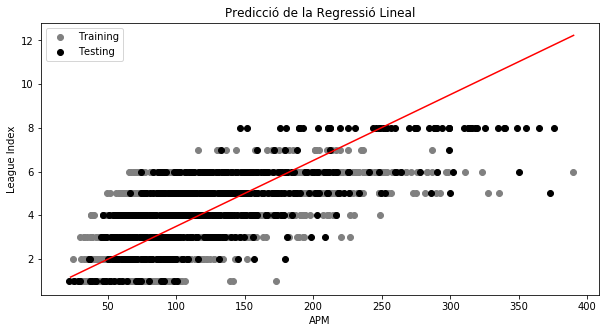

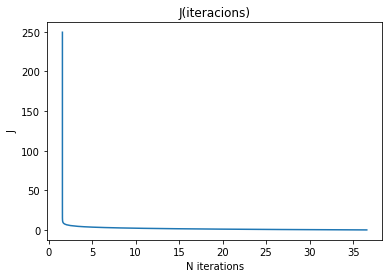

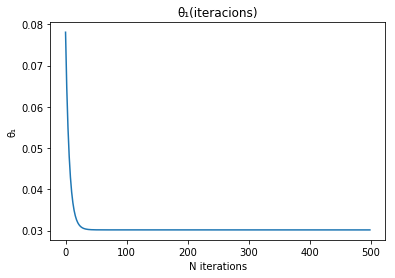

In [18]:
# PREDICCIO (entrenament)
plt.figure(0, figsize=(10,5))
plt.title('Predicció de la Regressió Lineal')
plt.xlabel('APM')
plt.ylabel('League Index')
plt.scatter(x_train, y_train, color = 'grey', label='Training')
plt.scatter(x_test, y_test, color = 'black', label='Testing')
plot_line(y, x_train)
plt.legend()
plt.show()

# COST
plt.figure(1)
plt.title('J(iteracions)')
plt.xlabel('N iterations')
plt.ylabel('J')
plot_array(np.arange(num_iterations)/2, array_cost)

# ESTABILITZACIO DE LA THETA
plt.figure(2)
plt.title('\u03B8₁(iteracions)')
plt.xlabel('N iterations')
plt.ylabel('\u03B8₁')
plt.plot(array_theta)


## Ex 3. Getting rid of outliers

In [19]:
# WE LOOK FOR OUTLIERS

# (first we create the matrix 'train_data') - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
train_data = []
# "agrupamos la info de apm por liga para que sea mas sencillo hacer los outliers de cada liga:
# crearemos una matriz de nligas x players que contenga el valor apm de cada uno de ellos que pertenezcan a dicha liga
# (ligas del 1 al 8, que trataremos como un array del 0 al 7 (posicion y = liga - 1))"
# IMPORTANTE: Aunque ocho ligas, nuestros datos de entrenamiento no contienen ningun jugador mayor a la séptima liga, de
# modo que la última fila aparecerá vacía
train_data.append([])
train_data.append([])
train_data.append([])
train_data.append([])
train_data.append([])
train_data.append([])
train_data.append([])
for u in range(len(x_train)):
    # esto es si queremos agregar los indices
    #train_data[y_train[u] - 1].append(u)
    # esto es si en vez de los indices, queremos poner directamente el valor de x (apm) del jugador
    train_data[y_train[u] - 1].append(x_train[u])


# (now we search the outliers of every league)  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
for league in range(len(train_data)):
    aux_x_array = []
    aux_y_array = []
    outliers_per_league = detect_outlier(train_data[league]) # we detect the outliers
    #for out in outliers_per_league:
    #    outliers.append(out)
    print(f'-> League {league+1}: {len(train_data[league])} elements.')
    print(f'\t{len(outliers_per_league)} outlier(s) detected!')
    outliers.append(outliers_per_league)

-> League 1: 140 elements.
	3 outlier(s) detected!
-> League 2: 279 elements.
	2 outlier(s) detected!
-> League 3: 441 elements.
	7 outlier(s) detected!
-> League 4: 661 elements.
	10 outlier(s) detected!
-> League 5: 653 elements.
	9 outlier(s) detected!
-> League 6: 514 elements.
	3 outlier(s) detected!
-> League 7: 28 elements.
	0 outlier(s) detected!


In [20]:
# NOW WE DELETE THE OUTLIERS (from the 'train_data' variable) AND CREATE A 1Dimensional X AND Y ARRAY AGAIN

# We delete the outliers from the train_data matrix:
for league in range(len(train_data)):
    
    for outlier in reversed(outliers[league]):
        print(f'Liga {league+1} -> Eliminado valor {train_data[league][outlier]} (indice = {outlier})')
        train_data[league].pop(outlier)

# We create a 1D array from the matrix (so we can reuse the defined functions)
for league in range(len(train_data)):
    for player in range(len(train_data[league])):
        y_train_nooutliers.append(league + 1)
        x_train_nooutliers.append(train_data[league][player])
    

Liga 1 -> Eliminado valor 141.6282 (indice = 127)
Liga 1 -> Eliminado valor 172.953 (indice = 124)
Liga 1 -> Eliminado valor 139.6362 (indice = 102)
Liga 2 -> Eliminado valor 142.767 (indice = 272)
Liga 2 -> Eliminado valor 151.64700000000002 (indice = 169)
Liga 3 -> Eliminado valor 193.3422 (indice = 435)
Liga 3 -> Eliminado valor 182.3736 (indice = 377)
Liga 3 -> Eliminado valor 192.3036 (indice = 348)
Liga 3 -> Eliminado valor 188.1348 (indice = 286)
Liga 3 -> Eliminado valor 226.6554 (indice = 268)
Liga 3 -> Eliminado valor 189.465 (indice = 177)
Liga 3 -> Eliminado valor 220.0692 (indice = 85)
Liga 4 -> Eliminado valor 211.7124 (indice = 660)
Liga 4 -> Eliminado valor 249.021 (indice = 655)
Liga 4 -> Eliminado valor 227.2272 (indice = 638)
Liga 4 -> Eliminado valor 215.01 (indice = 605)
Liga 4 -> Eliminado valor 214.2684 (indice = 526)
Liga 4 -> Eliminado valor 216.4152 (indice = 498)
Liga 4 -> Eliminado valor 206.838 (indice = 466)
Liga 4 -> Eliminado valor 229.9122 (indice = 433

## Ex 4. Training our model with the new data (no outliers)

In [21]:
# WE REINITIALIZE OUR VARIABLES
# (we need the same starting values in order to make a good comparison)
m = initial_m
n = initial_n
array_cost = []
array_theta = []

# WE TRAIN OUR MODEL
for iteration in range(num_iterations):
    #print(iteration)
    # we calculate new M's and N's
    s1, s2 = gradient_step(y, x_train_nooutliers, y_train_nooutliers)
    m = m - learning_rate * s2
    n = n - learning_rate * s1
    
    # we calculate and add the new cost and theta
    array_cost.append(current_cost(n,m,x_train_nooutliers,y_train_nooutliers))
    array_theta.append(m)

print(f'Value of \u03B8₀ (n) [NO OUTLIERS]: {n}')
print(f'Value of \u03B8₁ (m) [NO OUTLIERS]: {m}')

Value of θ₀ (n) [NO OUTLIERS]: 0.4776126261152944
Value of θ₁ (m) [NO OUTLIERS]: 0.030920044363469457


## Ex 5. Show graphs of our new data

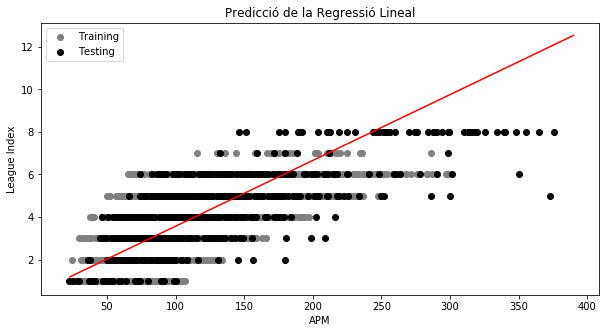

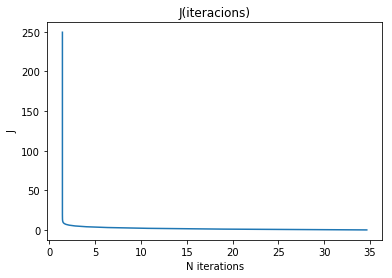

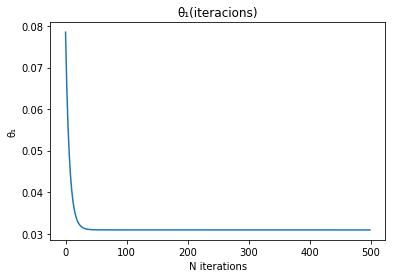

In [23]:
# PREDICCIO (entrenament)
plt.figure(0, figsize=(10,5))
plt.title('Predicció de la Regressió Lineal')
plt.xlabel('APM')
plt.ylabel('League Index')
plt.scatter(x_train_nooutliers, y_train_nooutliers, color = 'grey', label='Training')
plt.scatter(x_test, y_test, color = 'black', label='Testing')
plot_line(y, x_train)
plt.legend()
plt.show()

# COST
plt.figure(1)
plt.title('J(iteracions)')
plt.xlabel('N iterations')
plt.ylabel('J')
plot_array(np.arange(num_iterations)/2, array_cost)

# ESTABILITZACIO DE LA THETA
plt.figure(2)
plt.title('\u03B8₁(iteracions)')
plt.xlabel('N iterations')
plt.ylabel('\u03B8₁')
plt.plot(array_theta)


## Ex 6. Results' comparison

In [24]:
# This exercise is in the memory of this practice ('LR-memoria_joel.lopez_alex.pons.pdf')